In [11]:
import pandas as pd
import numpy as np
from utils.measure import *

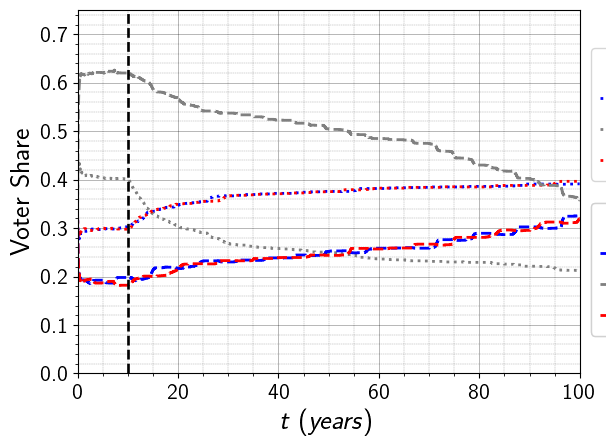

In [51]:
df_gaussian = pd.read_csv('experiment_2/Init_media_distributions_gaussian/figures_20241130/opinion_trend.txt',sep='\t')
df_uniform = pd.read_csv('experiment_2/Init_media_distributions_uniform/figures_20241130/opinion_trend.txt',sep='\t')
df_fixed = pd.read_csv('illustration/opinion_trend.txt',sep='\t')
df_fixed.index = 5*df_fixed.index

dfs = [ df_fixed, df_gaussian]
linestyles = ['dotted', 'dashed', 'dashdot']

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')  # Use a serif font for LaTeX style
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')  # Use sans-serif math mode
plt.rcParams.update({
    'font.size': 18,  # General font size
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 20,  # Label font size
    'legend.fontsize': 16,  # Legend font size
    'xtick.labelsize': 16,  # x-axis tick font size
    'ytick.labelsize': 16   # y-axis tick font size
})
# Prepare lists to capture handles and labels
handles_fixed = []
labels_fixed = []
handles_gaussian = []
labels_gaussian = []

# Iterate over the dataframes and linestyles
for df, linestyle, handle_list, label_list in zip(dfs, linestyles,
                                                              [handles_fixed, handles_gaussian],
                                                              [labels_fixed, labels_gaussian]):
    for column in df.columns:
        # Assign colors based on opinion values
        if column == '-1':
            color = 'blue'
        elif column == '1':
            color = 'red'
        else:
            color = 'grey'

        # Plot data
        line, = plt.plot(
            df.index * 1 / 365, df[column],
            label=f"Opinion {column}",
            color=color,
            linewidth=2,
            linestyle=linestyle
        )
        # Save handle and label for legend
        handle_list.append(line)
        label_list.append(f"Opinion {column}")

# Add vertical line
plt.axvline(x=10, color='k', linestyle='--', linewidth=1.9)

# Set limits and labels
plt.xlim([0, 100])
plt.ylim([0, 0.75])
plt.xlabel(r"$t \; (years)$")
plt.ylabel(r"Voter Share")

# Customize grid
plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.4)
plt.grid(which='minor', color='black', linestyle='--', linewidth=0.3, alpha=0.4)

# Add separate legends for Fixed and Gaussian
legend_fixed = plt.legend(handles_fixed, labels_fixed, loc='lower left', title="Fixed", bbox_to_anchor=(1, 0.5))
legend_gaussian = plt.legend(handles_gaussian, labels_gaussian, loc='upper left', title="Gaussian", bbox_to_anchor=(1, 0.5))

# Add both legends to the plot
plt.gca().add_artist(legend_fixed)
plt.gca().add_artist(legend_gaussian)

# Adjust layout
plt.tight_layout()
plt.savefig("experiment_2/initial_media_dist_1.png",bbox_extra_artists=(legend_fixed,), bbox_inches="tight")
plt.savefig("experiment_2/initial_media_dist_1.pdf",bbox_extra_artists=(legend_fixed,), bbox_inches="tight")

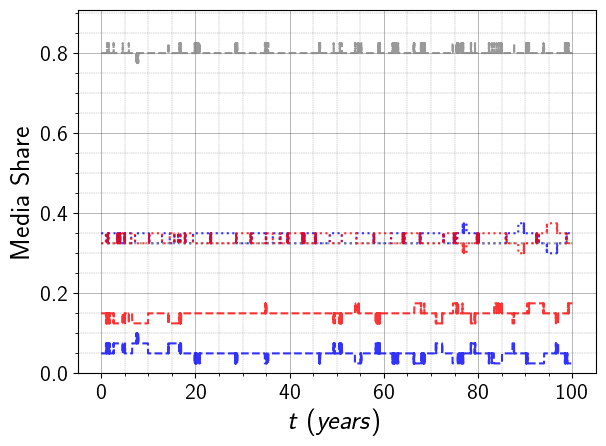

In [64]:
df_gaussian = pd.read_csv('experiment_2/Init_media_distributions_gaussian/figures_20241130/media_statistics.csv')
df_uniform = pd.read_csv('experiment_2/Init_media_distributions_uniform/figures_20241130/media_statistics.csv')
df_fixed = pd.read_csv('illustration/media_statistics.csv')

dfs = [df_fixed, df_gaussian]
handles_fixed = []
labels_fixed = []
handles_gaussian = []
labels_gaussian = []
linestyles = ['dotted', 'dashed', 'dashdot']
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')  # Use a serif font for LaTeX style
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')  # Use sans-serif math mode
plt.rcParams.update({
    'font.size': 18,  # General font size
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 20,  # Label font size
    'legend.fontsize': 16,  # Legend font size
    'xtick.labelsize': 16,  # x-axis tick font size
    'ytick.labelsize': 16   # y-axis tick font size
})
for df_stats, lstyle, handle_list, label_list in zip(dfs, linestyles,[handles_fixed, handles_gaussian],[labels_fixed, labels_gaussian]):
    x_values = df_stats.index / 365  # Days from DataFrame index

    line, = plt.plot(x_values, df_stats["blue"],  color="blue", alpha = 0.8, linestyle=lstyle)
    handle_list.append(line)
    label_list.append("Blue")
    line, = plt.plot(x_values, df_stats["neutral"],  color="gray", alpha = 0.8, linestyle=lstyle)
    handle_list.append(line)
    label_list.append("Neutral")
    line, = plt.plot(x_values, df_stats["red"], color="red", alpha = 0.8, linestyle=lstyle)
    handle_list.append(line)
    label_list.append("Red")
plt.xlabel(r"$t \; (years)$")
plt.ylabel(r"Media Share")
legend_fixed = plt.legend(handles_fixed, labels_fixed, loc='lower left', title="Fixed", bbox_to_anchor=(1, 0.5))
legend_gaussian = plt.legend(handles_gaussian, labels_gaussian, loc='upper left', title="Gaussian", bbox_to_anchor=(1, 0.5))
# Customize grid
plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.4)
plt.grid(which='minor', color='black', linestyle='--', linewidth=0.3, alpha=0.4)
# Add both legends to the plot
plt.gca().add_artist(legend_fixed)
plt.gca().add_artist(legend_gaussian)
plt.ylim(0, max(df_stats[["blue", "neutral", "red"]].max()) * 1.1)
plt.tight_layout()
plt.savefig("experiment_2/media_share.png",bbox_extra_artists=(legend_fixed,), bbox_inches="tight")
plt.savefig("experiment_2/media_share.pdf",bbox_extra_artists=(legend_fixed,), bbox_inches="tight")

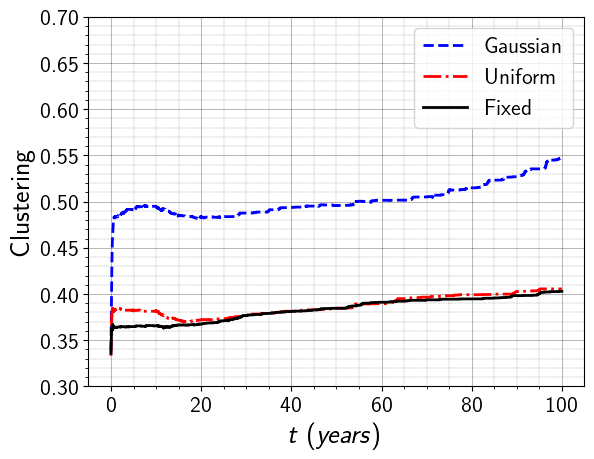

In [85]:
gaussian = pd.read_csv('experiment_2/Init_media_distributions_gaussian/figures_20241130/network_clustering.txt')
uniform = pd.read_csv('experiment_2/Init_media_distributions_uniform/figures_20241130/network_clustering.txt')
fixed = pd.read_csv('illustration/network_clustering.txt')
dfs = [gaussian, uniform, fixed]
names = ['Gaussian', 'Uniform', 'Fixed']
colors = ['blue', 'red', 'black']
linestyles = ['dashed', 'dashdot', 'solid']
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')  # Use a serif font for LaTeX style
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')  # Use sans-serif math mode
plt.rcParams.update({
    'font.size': 18,  # General font size
    'axes.titlesize': 20,  # Title font size
    'axes.labelsize': 20,  # Label font size
    'legend.fontsize': 16,  # Legend font size
    'xtick.labelsize': 16,  # x-axis tick font size
})
for df, n, ls,c in zip(dfs, names, linestyles, colors):
    plt.plot(
            df.index * 1 / 365, df,
            label=n,
            color=c,
            linewidth=2,
            linestyle=ls
        )
plt.ylim([0.3, 0.7])
plt.ylabel('Clustering')
plt.xlabel(r"$t \; (years)$")
plt.legend(loc="upper right")
plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.4)
plt.grid(which='minor', color='black', linestyle='--', linewidth=0.3, alpha=0.4)
plt.savefig("experiment_2/clustering.png", bbox_inches="tight")
plt.savefig("experiment_2/clustering.pdf",bbox_inches="tight")